# Prediction of Car price using the concepts of Lasso Regression and Multiple Linear Regression using Recursive Feature Elimination 

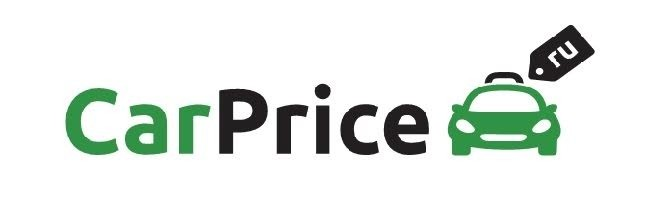

In [1]:
from IPython.display import Image,Markdown, display
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
Image(r"D:\Sunny_Personal\OSU MSBA\Fall 2019\GitHub\carprice.jpg")

# Step 1 : Importing and understanding the structure of the data

In [2]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [3]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV,Lasso
from sklearn.model_selection import cross_val_score

In [4]:
#importing the dataset
car_price_data=pd.read_csv('CarPrice_Assignment.csv')

#printing out number of rows and columns
shape=car_price_data.shape
print(color.BOLD + "There are " +str(shape[0])+ " rows  and "+str(shape[1])+" columns")


print('\n')
print('\n')


#printing out the datatypes and number of non-missing values
print(car_price_data.info())

There are 205 rows  and 26 columns




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  engin

# <font color="brown"> Step 2: Pre-processing the data


    * Data Manipulation
    * Handling the missing values,Dropping the unnecessary columns (ID variables)
    * Type Casting
    
    * Exploratory Data Analysis 
                    Correlations between predictors annd Target 
                    Correlations among the predictors
    
    * Dropping the insigficant variables                
    * Transforming the skewed numeric variables
    * Grouping levels of categorical variables if necessary
    * Dummy coding the categorical variables
    * Splitting the data

### Data Manipulations

In [5]:
#Creating a variable Company from the variable CarName
car_price_data['Company']=car_price_data.CarName.str.split(' ').str[0]

#Dropping the CarName and car_ID column
car_price_data.drop(columns=['CarName','car_ID'],inplace=True)

#There are some misspelt words in the data set
#Correcting the spellings of misspelt company names
car_price_data.Company.replace('maxda','mazda',inplace=True)
car_price_data.Company.replace('Nissan','nissan',inplace=True)
car_price_data.Company.replace('porcshce','porsche',inplace=True)
car_price_data.Company.replace('toyouta','toyota',inplace=True)
car_price_data.Company.replace('vokswagen','volkswagen',inplace=True)
car_price_data.Company.replace('vw','volkswagen',inplace=True)

#Replacing values of cylinder number
car_price_data.replace({'cylindernumber':{'two':2,
                                        'three':3,
                                        'four':4,
                                        'five':5,
                                        'six':6,
                                        'eight':8,
                                        'twelve':12}},inplace=True)


#Looking if there ae no duplicates in the columns
print(car_price_data.loc[car_price_data.duplicated()])
print(' ')
print(color.GREEN+'No columns are duplicated')

Empty DataFrame
Columns: [symboling, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price, Company]
Index: []

[0 rows x 25 columns]
 
No columns are duplicated


###  Handling the missing values 

In [6]:

#Looking at columns with missing values
print(car_price_data.columns[car_price_data.isna().sum()!=0])
print(color.GREEN+'No columns have missing values')

Index([], dtype='object')
No columns have missing values


### Type Casting

In [7]:
#Converting the column Symboling to categorical
car_price_data['symboling']=car_price_data['symboling'].astype('object')
car_price_data['cylindernumber']=car_price_data['cylindernumber'].astype('object')

#splitting the columns into numerical and categorical columns
numeric_cols_data=car_price_data.select_dtypes(include=['int64','float64'])
print(color.RED+'The quantitative variables are')
print(numeric_cols_data.columns)

print('')
print('#####################################################')
print('')

categorical_cols_data=car_price_data.select_dtypes(include=['object'])
print(color.GREEN+ 'The qualitative variables are')
print(categorical_cols_data.columns)


The quantitative variables are
Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

#####################################################

The qualitative variables are
Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'Company'],
      dtype='object')


### Exploratory Data Analysis 

### Visualizing the distribution of the Target variable "Price of the car"

    
    1.An outlier is a data point whose response y does not follow the general trend of the
    rest of the data
    
    2.A data point has high leverage if it has "extreme" predictor x values
    
### Handling Outliers

    If the outlier in question is:

    1. A measurement error or data entry error, correct the error if possible. 
       If you can’t fix it, remove that observation because you know it’s incorrect
       
    2. Not a part of the population you are studying (i.e., unusual properties or conditions),
       you can legitimately remove the outlier
       
    3. A natural part of the population you are studying, you should not remove it.

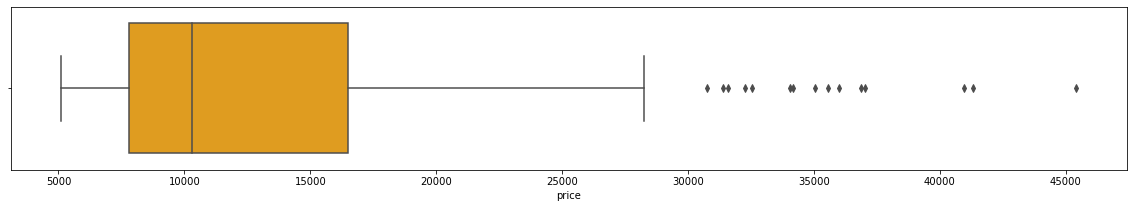

Cars with prices above 25000 are outliers as seen from the boxplot.
From looking at the data, we can say that these are the premium cars like bmw,jaguar
As it is natural part of the population, I have not removed the outliers


0        bmw
1     jaguar
2      buick
3    porsche
dtype: object

In [8]:
#Looking at the boxplot of the target variable
plt.figure(figsize = (20,3))
sns.boxplot(x = 'price', data = car_price_data,color="orange")
plt.show()

print(color.BOLD+'Cars with prices above 25000 are outliers as seen from the boxplot.\n\
From looking at the data, we can say that these are the premium cars like bmw,jaguar')
print('As it is natural part of the population, I have not removed the outliers' )

pd.Series(car_price_data[car_price_data['price']>25000]['Company'].str.split(' ').str[0].unique())

### <font color="brown"> Visualizing numeric variables 

### *Univariate Analysis*

Most of the variables look like normally distributed.All the variables are normal except for ['enginesize', 'compressionratio', 'price']


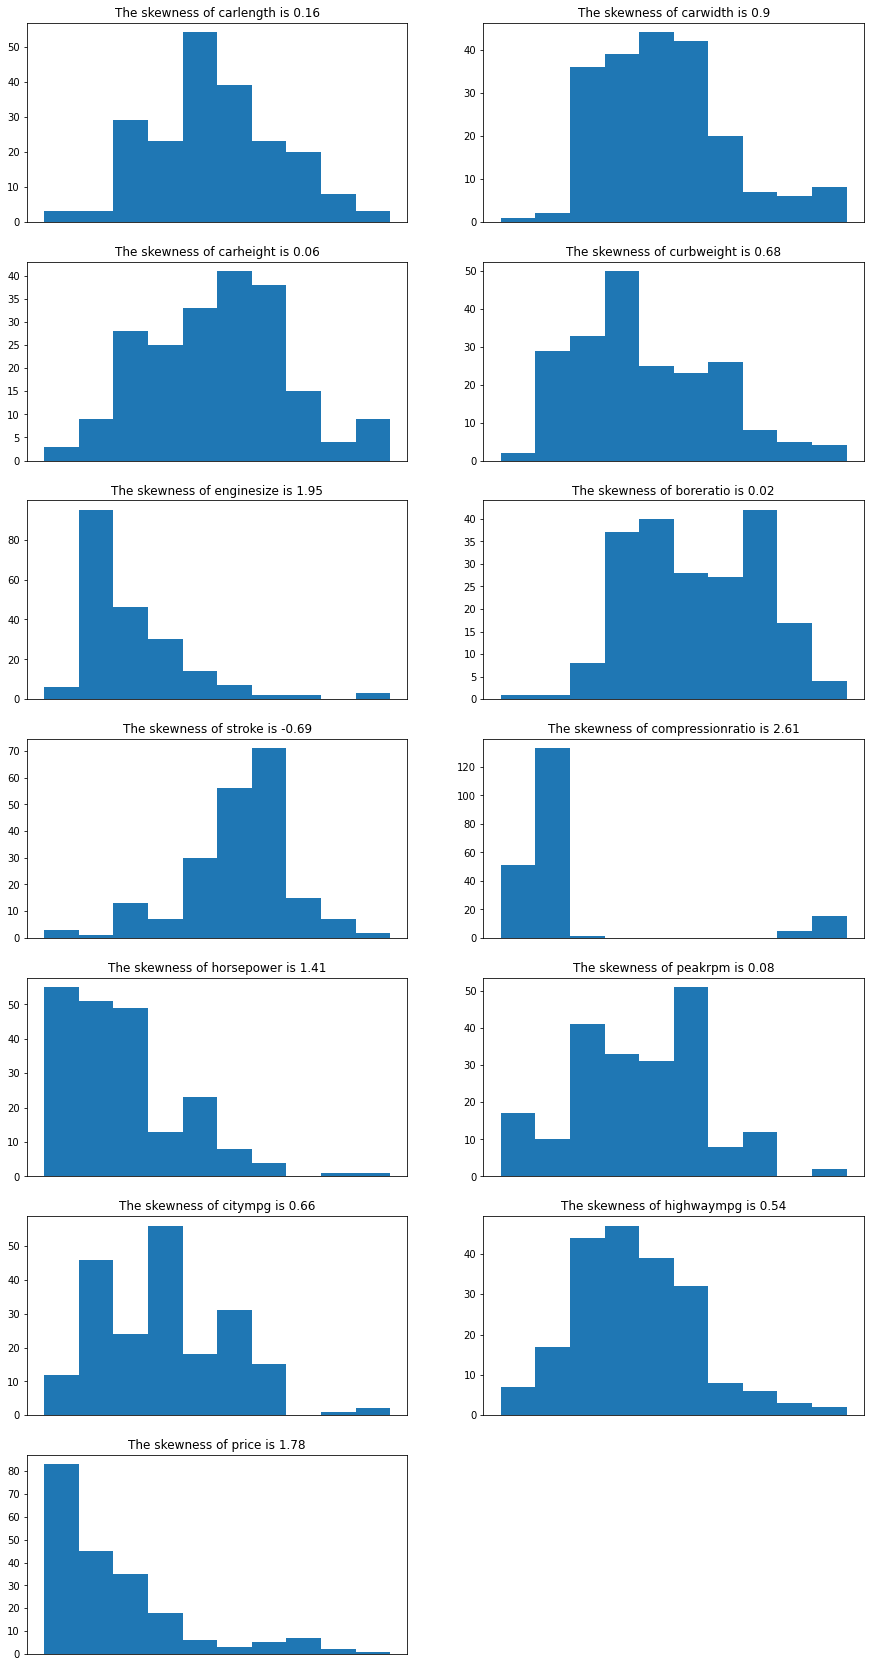

In [9]:
#plotting the variables of all the clusters
skewed_variables=[]

plt.figure(figsize=(15,30))
for i in range(0,len(numeric_cols_data.columns)-1):
    column_name=numeric_cols_data.columns[i+1]
    skewness=numeric_cols_data[column_name].skew(axis = 0, skipna = True)
    plt.subplot(7,2,i+1)
    plt.xticks([])
    plt.title('The skewness of ' +str(column_name) +' is ' +str(round(skewness,2)))
    plt.hist(numeric_cols_data[column_name])
    if( (skewness>1.5) or (skewness<-1.5)):
        skewed_variables.append(column_name)
        
if(len(skewed_variables)==0):    
    print(color.GREEN+'All the variables looks normally distributed')
else:
      print(color.RED+'Most of the variables look like normally distributed.All the variables are normal except for '+str(skewed_variables))

### Correlation Analysis

* Creating a correlation matrix to look at the issue of multi-collinearity ( correlation among the predictors). Correlation analysis is one of the methods used to decide which features affect the target variable the most, and in turn, get used in predicting this target variable. In other words, it’s a commonly-used method for feature selection in machine learning


In [10]:
# # Create the default pairplot
# sns.pairplot(numeric_cols_data)

(15.0, -1.0)

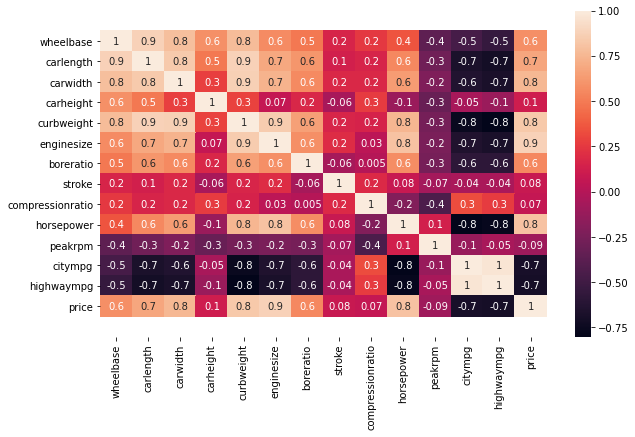

In [11]:
plt.figure(figsize = (10,6))
ax=sns.heatmap(numeric_cols_data.corr(), annot=True,fmt='.1g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 1, top -1)

### Insights from the correlation analysis

* Target (Price of the car) is highly correlated with   carwidth,curbweight,enginesize,horsepower,mileage of the car.
        * Price is negatively correlated with mileage and rpm 
        * Price is positively correlated with engine size,car width, car length
        
* Predictors share lots of variance among themselves (Multi-collinearity)
       For example, wheelbase is highly correlated with car length and car width. 
       Horse power is highly correlated with the mileage. 
       Highway mileage and city mileage have a correlation of 1. To handle this, a variable
       mileage can be created as an average of both


* Carheight, stroke, compressionratio, peakrpm  have very low correlation with target car price

In [12]:
#creating a mileage column which is an average of city mileage and highway mileage
car_price_data['mileage']=0.5*(car_price_data['citympg'] + car_price_data['highwaympg'] )

In [13]:
#dropping insignificant columns, city mileage, highway mileage from the correlation analysis
car_price_data.drop(columns=['carheight',
                             'compressionratio',
                             'peakrpm',
                             'stroke',
                             'citympg',
                             'highwaympg'],inplace=True)

In [14]:
car_price_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,price,Company,mileage
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,4,130,mpfi,3.47,111,13495.0,alfa-romero,24.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,4,130,mpfi,3.47,111,16500.0,alfa-romero,24.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,6,152,mpfi,2.68,154,16500.0,alfa-romero,22.5
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,4,109,mpfi,3.19,102,13950.0,audi,27.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,5,136,mpfi,3.19,115,17450.0,audi,20.0


###  Visualizing categorical variables 

In [15]:
#Function to plot the barchart of a categorical variable
#and number of observations within each level for that variable 

def barchart_freqcount(variable,fig):
    
    #Frequencyplot
    plt.subplot(10,2,fig)
    plt.title('Frequency plot of '+str(variable))
    sns.countplot(car_price_data[variable])
    
    #Boxplot
    plt.subplot(10,2,(fig+1))
    plt.title('Barchart of ' +str(variable)+ ' vs Price')
    sns.boxplot(x=car_price_data[variable], y=car_price_data.price)

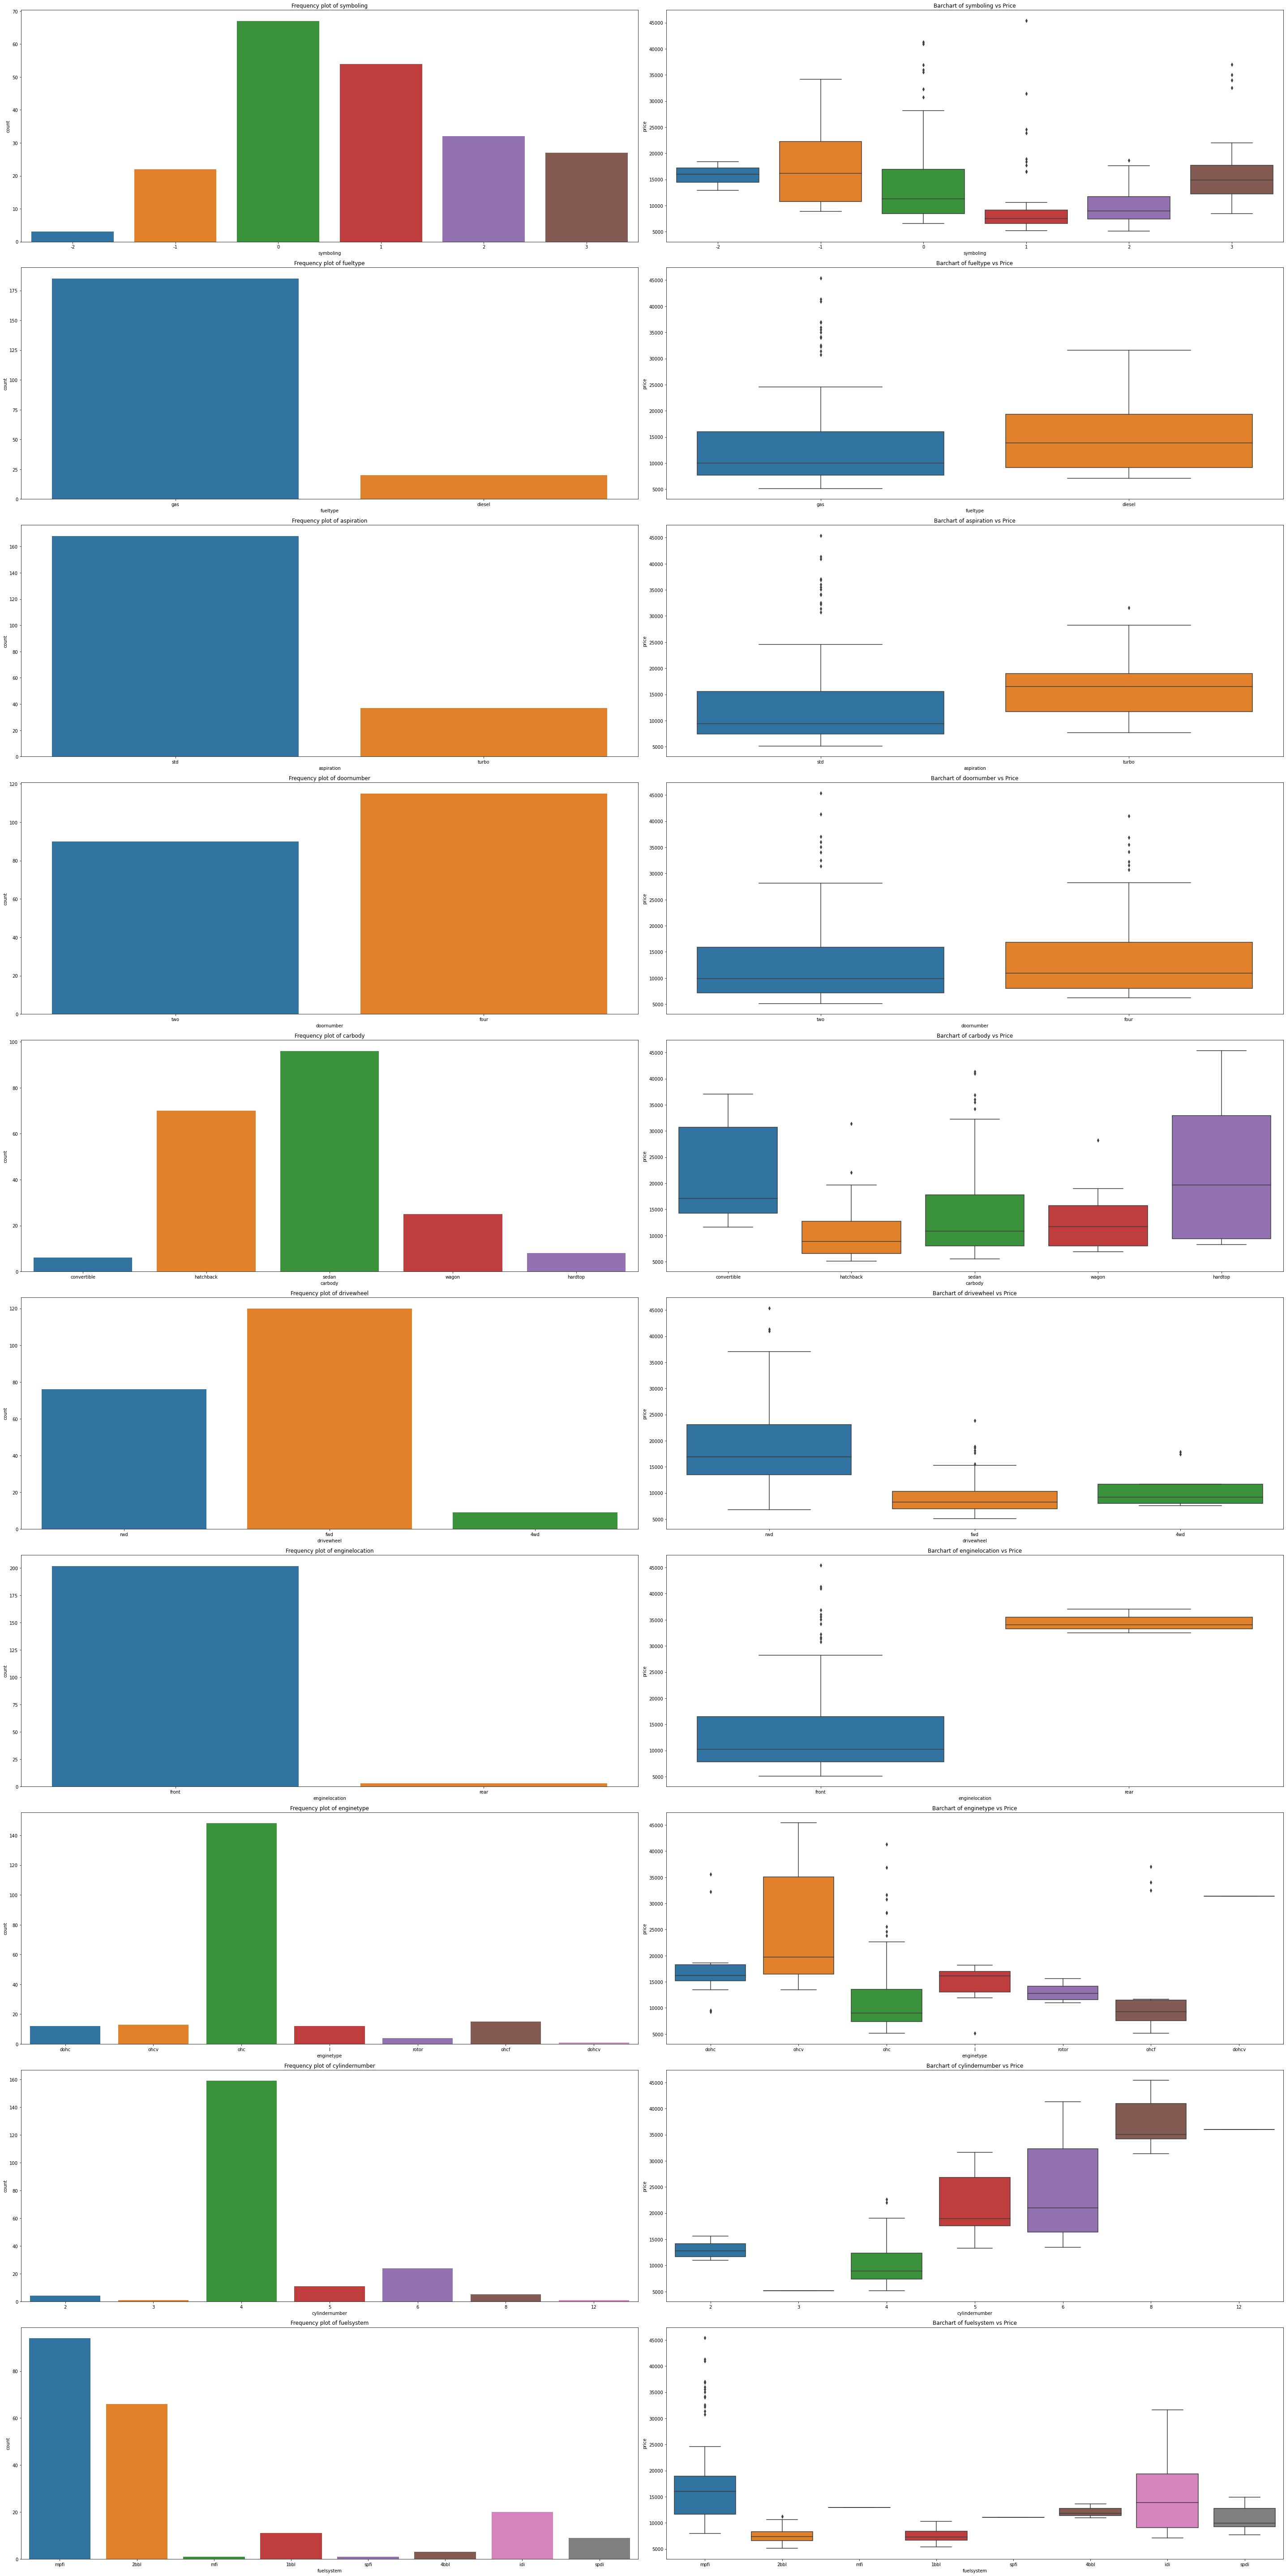

In [16]:
plt.figure(figsize=(40,80))
barchart_freqcount('symboling', 1)
barchart_freqcount('fueltype', 3)
barchart_freqcount('aspiration', 5)
barchart_freqcount('doornumber', 7)
barchart_freqcount('carbody', 9)
barchart_freqcount('drivewheel', 11)
barchart_freqcount('enginelocation', 13)
barchart_freqcount('enginetype', 15)
barchart_freqcount('cylindernumber',17)
barchart_freqcount('fuelsystem', 19)
plt.tight_layout()



### Highlights from the barcharts

    * Diesel vehicles are more pricier when compared to cars which run on gas.Cars that use
    gas have lower mean price when compared to the ones that use diesel.This is very 
    intuituive because  generally trucks which use diesel are expensive when compared to sedans

    * As the number of cylinders increases, the price of the cars tend to go up

    * Sports cars generally tend to have engine location on the rear side. 
      Therefore cars with engine  located on the rear side are more pricier than others
      
    * Cars with rear wheel drive are pricier which is completely intuitive

### Highlights from the frequency charts

    * There are fewer observations for diesel fueltype to consider for analysis (DROP)
    * There are fewer observations for rear engine location to consider for analysis (DROP)
    * Convertible and Hardtop are the same type of car models which can be merged 
    * We can group cylinder numbers as below 4 , 4 , 4-6 and above 6
    * We can group all the levels into others except OHC in engine type
    * Similarily, we can group levels of fuelsystem except mpfi,2bbl into others / Drop it
    * Dropping symboling column

In [17]:
#Dropping the columns which are not useful for our analysis
car_price_data.drop(columns=['fueltype','enginelocation'],inplace=True)

In [18]:
#dropping column as it has many levels and not significant in the analysis
car_price_data.drop(columns=['symboling','fuelsystem'],inplace=True)

In [19]:
#replacing the value 'hardtop' with convertible
car_price_data.replace({'carbody':{'hardtop':'convertible'}},inplace=True)

In [20]:
#replacing the all values except ohc to others
car_price_data.replace({'enginetype':{'dohc':'others',
                                      'ohcv':'others',
                                      'l':'others',
                                      'rotor':'others',
                                      'ohcf':'others',
                                      'dohcv':'others'}},inplace=True)

In [21]:
# #replacing the all values  of fuel system except mpfi, 2bbl to others
# car_price_data.replace({'fuelsystem':{'mfi':'others',
#                                       '1bbl':'others',
#                                       'spfi':'others',
#                                       '4bbl':'others',
#                                       'idi':'others',
#                                       'spdi':'others'}},inplace=True)

In [22]:
#binning the number of cylinders column
car_price_data.replace({'cylindernumber':{2:'below 4',
                                      3:'below 4',
                                      5:'5 and 6',
                                      6:'5 and 6',
                                      8:'above 6',
                                      12:'above 6'}},inplace=True)

Visualizations after the grouping of levels


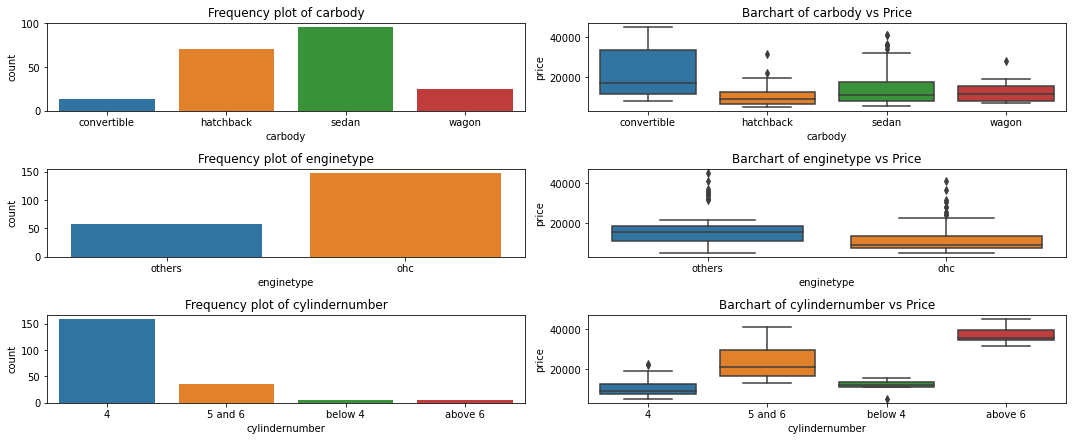

In [23]:
#Function to plot the barchart of a categorical variable
#and number of observations within each level for that variable 

def barchart_freqcount_new(variable,fig):
    
    #Frequencyplot
    plt.subplot(3,2,fig)
    plt.title('Frequency plot of '+str(variable))
    sns.countplot(car_price_data[variable])
    
    #Boxplot
    plt.subplot(3,2,(fig+1))
    plt.xaxis(off)
    plt.title('Barchart of ' +str(variable)+ ' vs Price')
    sns.boxplot(x=car_price_data[variable], y=car_price_data.price)
   
print(color.BOLD+color.RED+'Visualizations after the grouping of levels')
plt.figure(figsize=(15,20))
barchart_freqcount('carbody', 1)
barchart_freqcount('enginetype', 3)
barchart_freqcount('cylindernumber', 5)
plt.tight_layout()

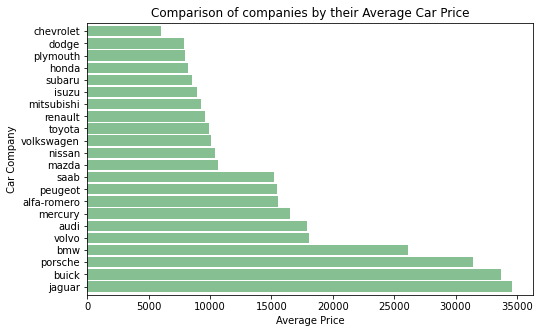

The Jauguars,Buicks have high price tags where chevrolet,dodge,honda tend to be less pricy
There are way too many companies. This might cause overfitting( dimensionality problem)
We can segment these companies into 3-4 levels


In [24]:
#Looking at the mean prices of car by company
Company_mean_prices=car_price_data.groupby(['Company'])['price'].mean().sort_values(ascending=False)
Company_mean_prices.plot(kind="barh",figsize=(8,5), color='#86bf91', zorder=2, width=0.85)
plt.title('Comparison of companies by their Average Car Price')
plt.xlabel('Average Price')
plt.ylabel(' Car Company ')
plt.show()
print('The Jauguars,Buicks have high price tags where chevrolet,dodge,honda tend to be less pricy')
print('There are way too many companies. This might cause overfitting( dimensionality problem)')
print('We can segment these companies into 3-4 levels')

In [25]:
#https://www.kaggle.com/goyalshalini93/car-price-prediction-linear-regression-rfe
#Binning the Car Companies based on avg prices of each Company.
car_price_data['price'] = car_price_data['price'].astype('int')
temp = car_price_data.copy()
table = temp.groupby(['Company'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='Company')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
car_price_data['cars_range'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
car_price_data['cars_range']=car_price_data['cars_range'].astype('object')
#dropping company column
car_price_data.drop(columns=['Company'],inplace=True)

In [26]:
car_price_data.head()

,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price,mileage,cars_range
0,std,two,convertible,rwd,88.6,168.8,64.1,2548,others,4,130,3.47,111,13495,24.0,Medium
1,std,two,convertible,rwd,88.6,168.8,64.1,2548,others,4,130,3.47,111,16500,24.0,Medium
2,std,two,hatchback,rwd,94.5,171.2,65.5,2823,others,5 and 6,152,2.68,154,16500,22.5,Medium
3,std,four,sedan,fwd,99.8,176.6,66.2,2337,ohc,4,109,3.19,102,13950,27.0,Medium
4,std,four,sedan,4wd,99.4,176.6,66.4,2824,ohc,5 and 6,136,3.19,115,17450,20.0,Medium


### Transforming the skewed variables

***
Most of the data looks like normal distributed. The variables needn't be transformed


###  Variable Reduction Techniques


***
#### Therefore, in presence of multi-collinearity, either variable selection methods(Recursive Feature Elimination Methods/ Ridge Regression/Lasso Regression) or Principal component analysis have to be performed to handle this problem.

***

    * If interpretation is of utmost importance and presence of multi collinearity,
      preserving original variables should be of utmost importance
      Recursive Feature Elimination Methods/ Ridge Regression/Lasso Regression can be used

    * If model accuracy is of utmost importance and all the variables are numeric,
      principal component analysis is a better choice

In [27]:
# Separate the numeric variables from the categorical variable
x=car_price_data.loc[:,car_price_data.columns !='price']
y=car_price_data.loc[:,car_price_data.columns =='price']
numeric_cols_data_1=x.select_dtypes(include=['int64','float64'])
categorical_cols_data_1=x.select_dtypes(include=['object'])

In [28]:
#standardizing numeric variables
from sklearn.preprocessing import StandardScaler
x_standard = StandardScaler().fit_transform(numeric_cols_data_1.select_dtypes(include=['int64','float64']))
x_standard_df=pd.DataFrame(x_standard,columns=numeric_cols_data_1.columns)

In [29]:
#Dummy coding the categorical variables
def dummy_coding(column,df):
    temp = pd.get_dummies(df[column], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([column], axis = 1, inplace = True)
    return df

# Applying the function to create dummy variables
categorical_cols_data_1 = dummy_coding('aspiration',categorical_cols_data_1)
categorical_cols_data_1 = dummy_coding('doornumber',categorical_cols_data_1)
categorical_cols_data_1 = dummy_coding('carbody',categorical_cols_data_1)
categorical_cols_data_1 = dummy_coding('drivewheel',categorical_cols_data_1)
categorical_cols_data_1 = dummy_coding('enginetype',categorical_cols_data_1)
categorical_cols_data_1 = dummy_coding('cars_range',categorical_cols_data_1)
categorical_cols_data_1 = dummy_coding('cylindernumber',categorical_cols_data_1)

In [30]:
# Concatenate the standardized numeric and dummy coded categorical variables
independent_variables=pd.concat([x_standard_df,categorical_cols_data_1],axis=1)
Final_df=pd.concat([independent_variables,y],axis=1)
print(color.BOLD+color.RED+'The final dataset for analysis')
print(Final_df.shape)

The final dataset for analysis
(205, 22)


### Splitting the data

In [31]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(Final_df, train_size = 0.7, test_size = 0.3, random_state = 100)

#Defining Target variable for the training data set
Y_train = df_train.pop('price')
X_train = df_train

#Defining Target variable for the training data set
Y_test = df_test.pop('price')
X_test = df_test

print('The shape of training data is' +str(X_train.shape))
print('The shape of testing data is' +str(X_test.shape))

The shape of training data is(143, 21)
The shape of testing data is(62, 21)


### Buidling the Linear Regression model using Recursive Feature Elimination 

In [40]:
from sklearn.feature_selection import RFE # Importing recursive feature elimination (stepwise)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

Regression_model = LinearRegression()
Regression_model.fit(X_train,Y_train)

#Performing recursive feature eliminate to choose top 10 features
rfe = RFE(Regression_model, 10)
rfe = rfe.fit(X_train, Y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
print('The selected columns after recursive feature elimination are')
#Subsetting the data using the selected variables
X_train=df_train[X_train.columns[rfe.support_]]
print(X_train.columns)
print(X_train.shape)

The selected columns after recursive feature elimination are
Index(['carwidth', 'curbweight', 'horsepower', 'hatchback', 'sedan', 'wagon',
       'Highend', 'Medium', '5 and 6', 'below 4'],
      dtype='object')
(143, 10)


(12.0, -1.0)

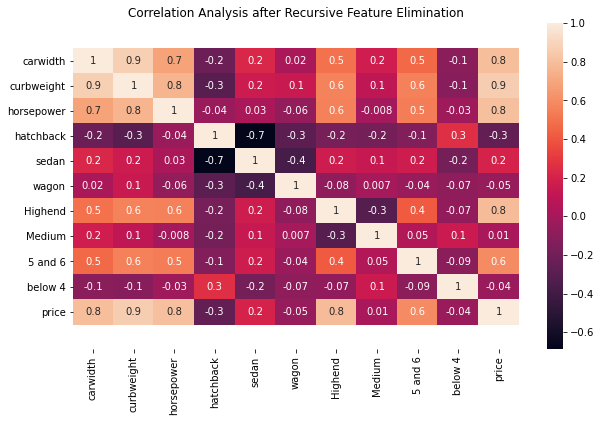

In [41]:
corr_analysis=pd.concat([X_train,Y_train],axis=1)
plt.figure(figsize = (10,6))
plt.title('Correlation Analysis after Recursive Feature Elimination')
ax=sns.heatmap(corr_analysis.corr(), annot=True,fmt='.1g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 1, top -1)

### Implementing Regression Model in statmodels

In [42]:
X = sm.add_constant(X_train) #Adding the constant
lm = sm.OLS(Y_train,X).fit() # fitting the model
print(lm.summary2()) # model summary

                  Results: Ordinary least squares
Model:               OLS              Adj. R-squared:     0.927     
Dependent Variable:  price            AIC:                2606.2978 
Date:                2020-04-18 22:33 BIC:                2638.8891 
No. Observations:    143              Log-Likelihood:     -1292.1   
Df Model:            10               F-statistic:        180.2     
Df Residuals:        132              Prob (F-statistic): 7.89e-72  
R-squared:           0.932            Scale:              4.4757e+06
--------------------------------------------------------------------
             Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
--------------------------------------------------------------------
const      14365.4925  923.2929 15.5590 0.0000 12539.1279 16191.8571
carwidth    1248.6497  385.2519  3.2411 0.0015   486.5833  2010.7161
curbweight  2159.6254  450.3257  4.7957 0.0000  1268.8367  3050.4140
horsepower  1501.4886  308.5151  4.8668 0.0000   891.

In [48]:

#predicted price by using the input independent variables
Y_train_pred=lm.predict(X)

print('The Root Mean Square Error is ')
np.sqrt(mean_squared_error(Y_train_pred,Y_train))

The Root Mean Square Error is 


2032.5931041749907

### <font color="brown"> Assumptions of Linear Regression Model

####  1. Errors are normally distributed

Text(0.5, 0, 'Errors')

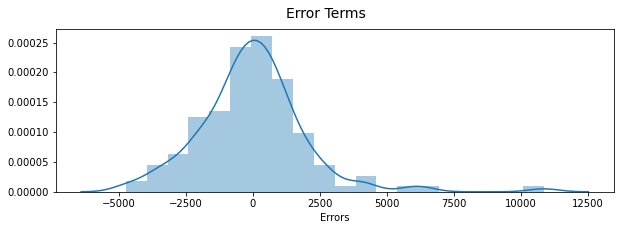

In [35]:

#Residual is the difference between the actual and predicted values
residuals=Y_train-Y_train_pred

fig = plt.figure(figsize=(10,3))
sns.distplot(residuals, bins = 20)
fig.suptitle('Error Terms', fontsize = 14)       
plt.xlabel('Errors', fontsize = 10)   

#### 2. No heteroskedasticity (homoskedasticity) 

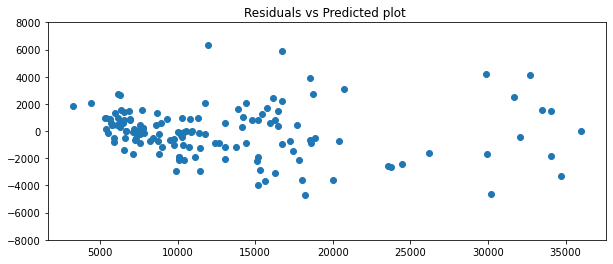

In [36]:
#Fitting the model on the test data
plt.figure(figsize=(10,4))
plt.scatter(Y_train_pred,residuals)
plt.ylim(-8000,8000)
plt.title('Residuals vs Predicted plot ')
plt.show()

#### 3. No Multicollinearity among the independent variables

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

print(color.BOLD+color.RED+'The Variance Inflation Factor for the selected variables are ')
checkVIF(X_train)

The Variance Inflation Factor for the selected variables are 


,Features,VIF
1,curbweight,7.07
0,carwidth,4.69
2,horsepower,3.04
4,sedan,2.24
7,Medium,2.15
6,Highend,2.13
8,5 and 6,2.01
3,hatchback,1.58
5,wagon,1.29
9,below 4,1.19


#### 4. Errors are uncorrelated 
        
        * Visually        - sequence plot
        * Statistically   - Durbin watson statistic 
                            ( Value between 1.5 and 2.5 means the errors are uncorrelated)

In [38]:
from statsmodels.stats.stattools import durbin_watson
d_w=durbin_watson(residuals)
print('The Durbin watson statistic is ' +str(round(d_w,2)))
print('Errors are uncorrelated')

The Durbin watson statistic is 1.93
Errors are uncorrelated


### <font color="brown">  Fitting the model on the test data

In [39]:
from sklearn.metrics import r2_score 

#Subsetting the data using the selected variables
X_test=df_test[['carwidth', 'curbweight', 'horsepower', 'hatchback', 'sedan', 'wagon','Highend', 'Medium', '5 and 6', 'below 4']]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test)
y_pred = lm.predict(X_test_new)

R_square=r2_score(Y_test, y_pred)
print(color.BOLD+color.RED+'The Adjusted R-square of the test data is ' +str(round((R_square)*100,2))+' %')

The Adjusted R-square of the test data is 90.25 %


In [49]:
print('The Mean Square Error is ')
np.sqrt(mean_squared_error(y_pred,Y_test))

The Mean Square Error is 


2613.534342338924